,Model,AUC mean
12,vectors_patient2vec_pvdbow_hs_win-5_emb-100.dill,0.844385


,Model,AUC mean
0,vectors_patient2vec_pvdbow_hs_win-30_emb-100.dill,0.852082


,Model,AUC mean
13,vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill,0.897944


,Model,AUC mean
2,vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill,0.912192


,Model,AUC mean
13,vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill,0.742398
4,vectors_patient2vec_pvdbow_hs_win-20_emb-300.dill,0.741575
7,vectors_patient2vec_pvdbow_hs_win-30_emb-300.dill,0.740753
2,vectors_patient2vec_pvdbow_hs_win-10_emb-50.dill,0.738254
1,vectors_patient2vec_pvdbow_hs_win-10_emb-300.dill,0.737601
5,vectors_patient2vec_pvdbow_hs_win-20_emb-50.dill,0.735768
3,vectors_patient2vec_pvdbow_hs_win-20_emb-100.dill,0.735282
9,vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill,0.734994
11,vectors_patient2vec_pvdbow_hs_win-50_emb-50.dill,0.734286
12,vectors_patient2vec_pvdbow_hs_win-5_emb-100.dill,0.734109


,Model,AUC mean
2,vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill,0.739473
3,vectors_patient2vec_pvdbow_hs_win-5_emb-100.dill,0.736051
1,vectors_patient2vec_pvdbow_hs_win-30_emb-50.dill,0.734247
0,vectors_patient2vec_pvdbow_hs_win-30_emb-100.dill,0.728770


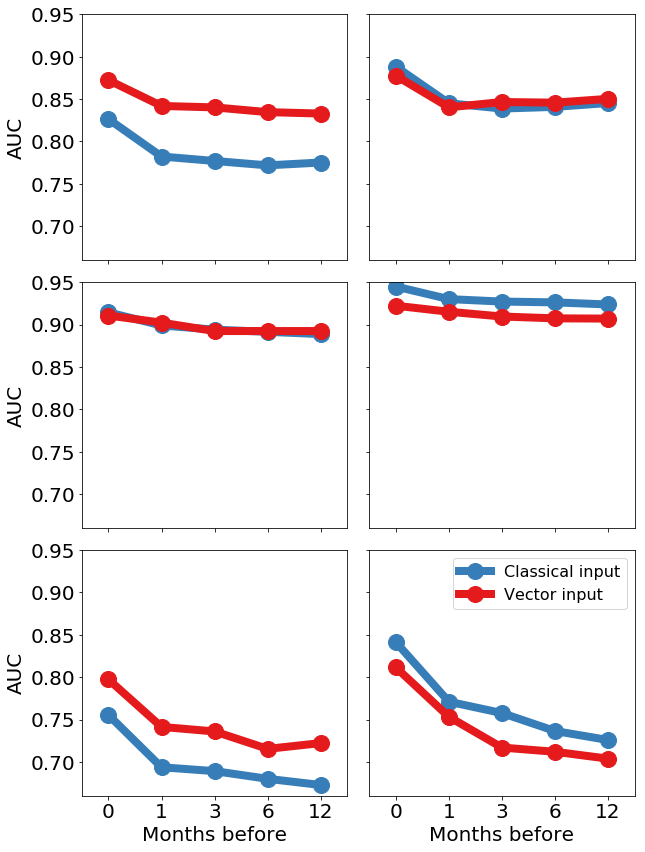

In [4]:
import dill
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def get_model_info(m_string):
    parts = m_string.split(".")[0].split("_")
    algo = parts[2]
    softmax = parts[3]
    window_size = parts[4].split("-")[1]
    emb_size = parts[5].split("-")[1]
    return "{}, {}, window: {}, embedding: {}".format(algo.upper(), softmax.upper(), window_size, emb_size)


x_months = [0,1,2,3,4]
x_months_ticks = ["0", "1", "3", "6", "12"]

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (9.0, 12)

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')


# Breast cancer
counts_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

# plt.setp(ax1.spines.values(), linewidth=2)

plt.setp(((ax1, ax2), (ax3, ax4), (ax5, ax6)), xticks=x_months, xticklabels=x_months_ticks, xlim=[-0.5, 4.5])
ax1.plot(x_months, counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax1.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# # plt.xlabel('Months before')
ax1.set_ylabel('AUC')
ax1.set_ylim([0.66, 0.95])
plt.xticks(x_months,x_months_ticks)
# plt.legend(loc='upper right')


counts_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

# plt.setp(ax2.spines.values(), linewidth=2)
ax2.plot(x_months, counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax2.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.legend(loc='upper right')
# plt.xlabel('Months before')
# plt.ylabel('AUC')
ax2.set_ylim([0.66, 0.95])



# Metformin
counts_elastic_results = pd.read_csv('../diabetes/log/diabetes_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../diabetes/log/diabetes_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

# plt.setp(ax3.spines.values(), linewidth=2)
ax3.plot(x_months, counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax3.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.xlabel('Months before')
# plt.ylabel('AUC')
ax3.set_ylim([0.66, 0.95])
ax3.set_ylabel('AUC')

# plt.legend(loc='upper right')

counts_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

# plt.setp(ax4.spines.values(), linewidth=2)
ax4.plot(x_months, counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax4.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.legend(loc='upper right')
# plt.xlabel('Months before')
# plt.ylabel('AUC')
ax4.set_ylim([0.66, 0.95])



# Lung cancer
counts_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:10])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

# plt.setp(ax5.spines.values(), linewidth=2)
ax5.plot(x_months, counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax5.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
ax5.set_xlabel('Months before')
ax5.set_ylabel('AUC')
ax5.set_ylim([0.66, 0.95])

# ax5.legend(loc='upper right', prop={'size': 16})


counts_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:10])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

# plt.setp(ax6.spines.values(), linewidth=2)
ax6.plot(x_months, counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax6.plot(x_months, df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# ax6.legend(loc='upper right')
ax6.set_xlabel('Months before')
# ax5.set_ylabel('AUC')
ax6.set_ylim([0.66, 0.95])
ax6.legend(loc='upper right', prop={'size': 16})

plt.tight_layout(pad=0.75) #, w_pad=0.5, h_pad=0)

f.savefig("images/all_auc_2.pdf", bbox_inches='tight')